In [1]:
%config InlineBackend.figure_format = "retina"
import sklearn.cluster as sk
from wwdk import data as d
from wwdk import cluster as cl
import matplotlib.pyplot as plt
import numpy as np
import scanpy as sc
import pandas as pd
import time

def time_k_plot(data, iterations, runs):
    liste = [0]
    sklearn_liste = [0]
    #inet_liste = []
    for i in range(iterations):
        meantime = []
        sk_meantime = []
        for j in range(runs):
            
            
            start = time.time()
            lib = cl.Kmeans(inits=10, method="rng", k=i+1, tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            '''
            inet_meantime =[]
            start = time.time()
            k_means(data,i+1,300)
            end = time.time()
            inet_meantime.append(end-start)
            '''
            start = time.time()
            lib = sk.KMeans(init="random", n_init=10, tol= 1, n_clusters=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
            
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
        #inet_liste.append(np.mean(inet_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste, label='WWDK')
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r", label='sklearn')
    plt.plot(sklearn_liste, "kx")
    #plt.plot(inet_liste, "g")
    #plt.plot(inet_liste, "kx")
    plt.xlabel("k")
    plt.ylabel("time[s]")
    plt.legend()
    return plt.show()

def inertia_k_plot(data, iterations, runs):
    inertia = [0]
    sklearn_inertia = [0]
    #inet_liste = []
    for i in range(iterations):
        meaninertia = []
        sk_meaninertia = []
        for j in range(runs):

            lib = cl.Kmeans(inits=10, method="rng", k=i+1, tol= 1)
            lib.fit(data)
            meaninertia.append(lib.inertia_)
            
            lib = sk.KMeans(init="random", n_init=10, tol= 1, n_clusters=i+1)
            lib.fit(data)
            sk_meaninertia.append(lib.inertia_)

        inertia.append(np.mean(meaninertia))
        sklearn_inertia.append(np.mean(sk_meaninertia))
        #inet_liste.append(np.mean(inet_meantime)
        
    plt.plot(inertia, label='WWDK')
    plt.plot(inertia, "kx")
    plt.plot(sklearn_inertia, "r", label='sklearn')
    plt.plot(sklearn_inertia, "kx")
    plt.xlabel("k")
    plt.ylabel("inertia")
    plt.legend()
    return plt.show()

def time_init_plot(data, iterations, runs):
    liste = [0]
    sklearn_liste = [0]
    
    for i in range(iterations):
        meantime =[]
        sk_meantime = []
        for j in range(runs):
            
            
            start = time.time()
            lib = cl.Kmeans(inits=i+1, method="rng", k=8,tol= 1)
            lib.fit(data)
            end = time.time()
            meantime.append(end-start)
            
            
            start = time.time()
            lib = sk.KMeans(init="random",n_clusters=8, n_init=i+1)
            lib.fit(data)
            end = time.time()
            sk_meantime.append(end-start)
        liste.append(np.mean(meantime))
        sklearn_liste.append(np.mean(sk_meantime))
     
    #print(lib.inertia_)
    plt.plot(liste, label='WWDK')
    plt.plot(liste, "kx")
    plt.plot(sklearn_liste, "r", label='sklearn')
    plt.plot(sklearn_liste, "kx")
    plt.xlabel("inits")
    plt.ylabel("time[s]")
    plt.legend()
    return plt.show()

def elbow_plot(data, max_k):
    Sum_of_squared_distances = []
    for i in range(max_k):
        km = cl.Kmeans(inits=10, method="rng", k=i+1)
        km.fit(data)
        Sum_of_squared_distances.append(km.inertia_)
    plt.plot(Sum_of_squared_distances, "kx")
    plt.plot(Sum_of_squared_distances)
    plt.xlabel("k")
    plt.ylabel("Sum of squared distances")
    return plt.show()

def plot(data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(data._k):
        graph = pd.DataFrame(data._data[np.argwhere(data.labels_ == i)].squeeze())
        center = pd.DataFrame(data.cluster_centers_[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )
    return plt.show()

fremd kmeans

In [64]:
def k_means(data, k, number_of_iterations):
    n = len(data)
    number_of_features = data.shape[1]
    # Pick random indices for the initial centroids.
    initial_indices = np.random.choice(range(n), k)
    # We keep the centroids as |features| x k matrix.
    means = data[initial_indices].T
    # To avoid loops, we repeat the data k times depthwise and compute the
    # distance from each point to each centroid in one step in a
    # n x |features| x k tensor.
    repeated_data = np.stack([data] * k, axis=-1)
    all_rows = np.arange(n)
    zero = np.zeros([1, 1, 2])
    for _ in range(number_of_iterations):
        # Broadcast means across the repeated data matrix, gives us a
        # n x k matrix of distances.
        distances = np.sum(np.square(repeated_data - means), axis=1)
        # Find the index of the smallest distance (closest cluster) for each
        # point.
        assignment = np.argmin(distances, axis=-1)
        # Again to avoid a loop, we'll create a sparse matrix with k slots for
        # each point and fill exactly the one slot that the point was assigned
        # to. Then we reduce across all points to give us the sum of points for
        # each cluster.
        sparse = np.zeros([n, k, number_of_features])
        sparse[all_rows, assignment] = data
        # To compute the correct mean, we need to know how many points are
        # assigned to each cluster (without a loop).
        counts = (sparse != zero).sum(axis=0)
        # Compute new assignments.
        means = sparse.sum(axis=0).T / counts.clip(min=1).T
    return means.T

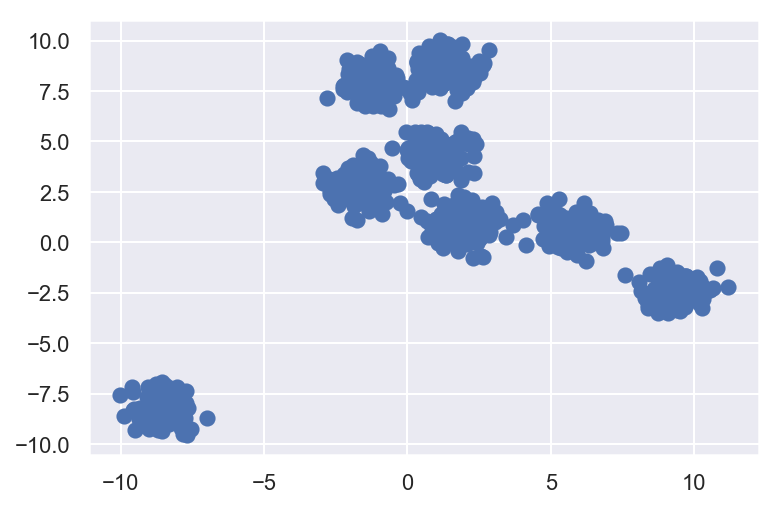

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from sklearn.datasets.samples_generator import make_blobs #random data generator
 
my_tuple = X, y_true = make_blobs(n_samples=1000, centers=8,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

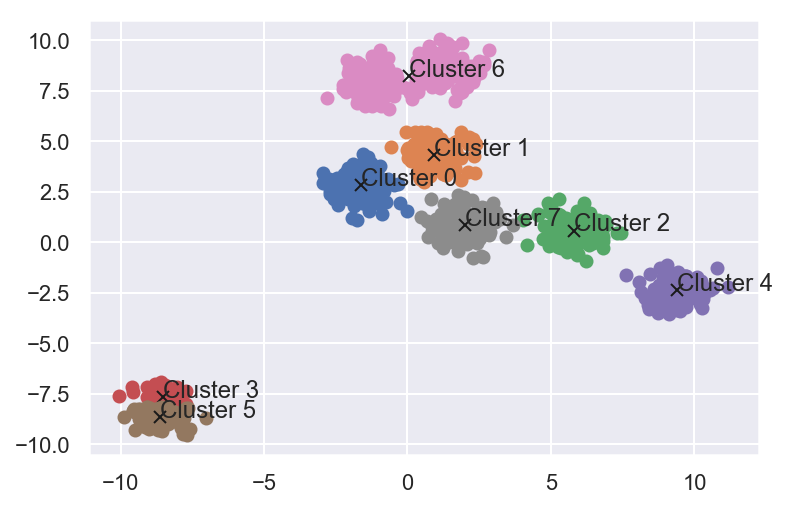

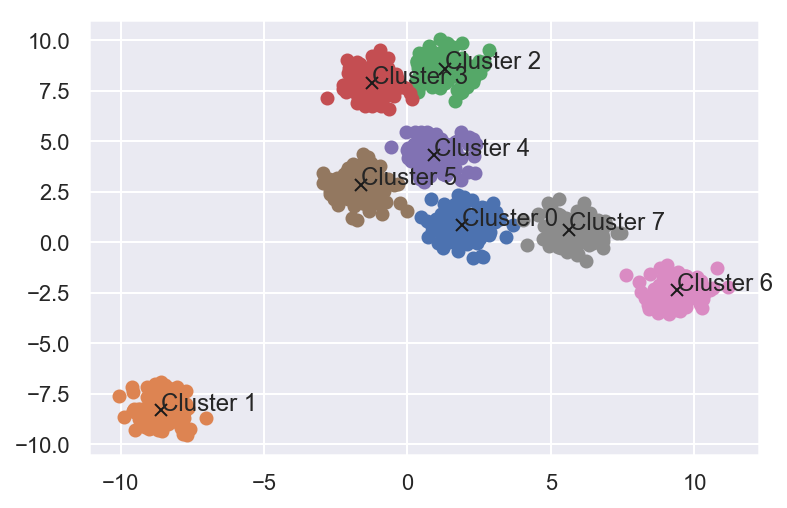

In [3]:
def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )   
    plt.show

me = cl.Kmeans(inits=10, method="rng", k=8, tol= 1)
me.fit(X)
ske = sk.KMeans(n_init=10, init="random", n_clusters=8, tol= 1)
ske.fit(X)

plot(X,me.labels_, me.cluster_centers_, 8)
plot(X,ske.labels_, ske.cluster_centers_, 8)

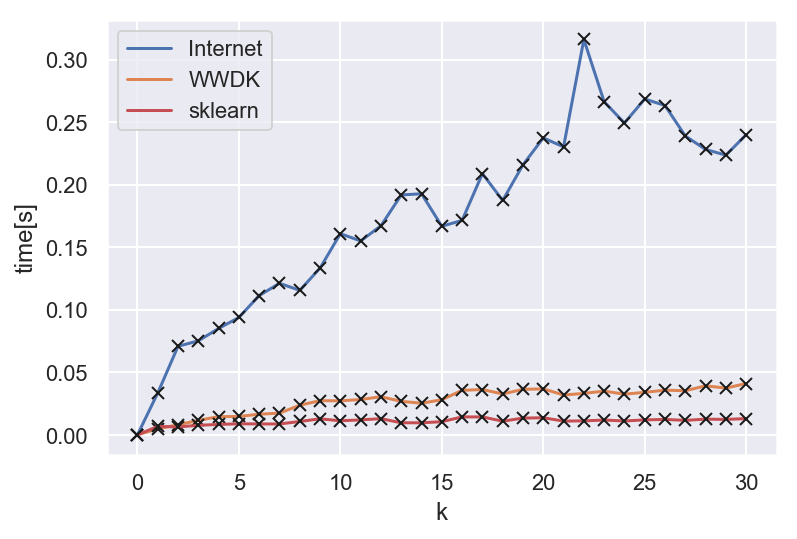

In [73]:
inet_liste = [0]
for i in range(30):
    
    inet_meantime =[]
    for j in range(10):
        start = time.time()
        k_means(X,i+1,300)
        end = time.time()
        inet_meantime.append(end-start)
    inet_liste.append(np.mean(inet_meantime))
            
plt.plot(inet_liste, label='Internet')
plt.plot(inet_liste, "kx")
time_k_plot(X, iterations=30, runs=10)

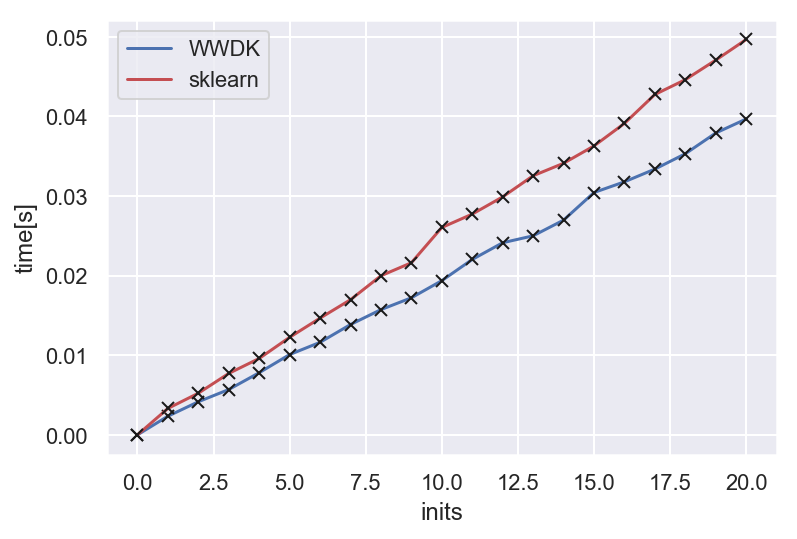

In [5]:
time_init_plot(X, iterations=20, runs=30)

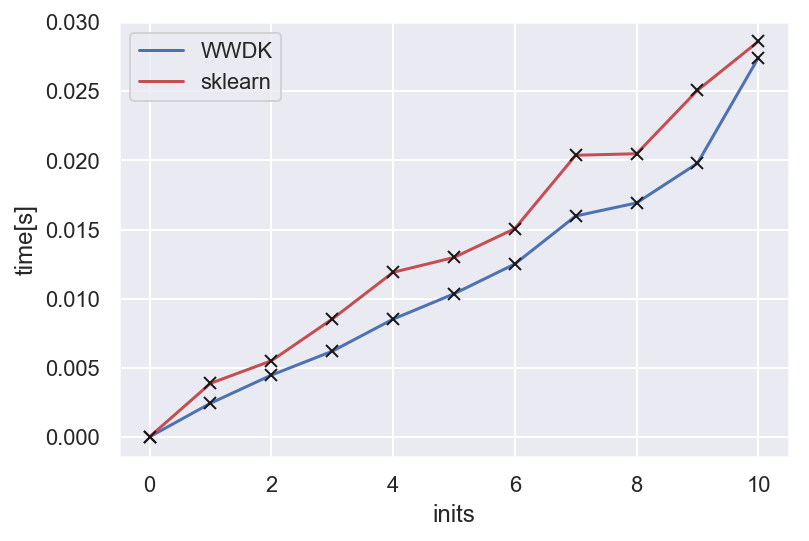

In [6]:
time_init_plot(X, iterations=10, runs=30)

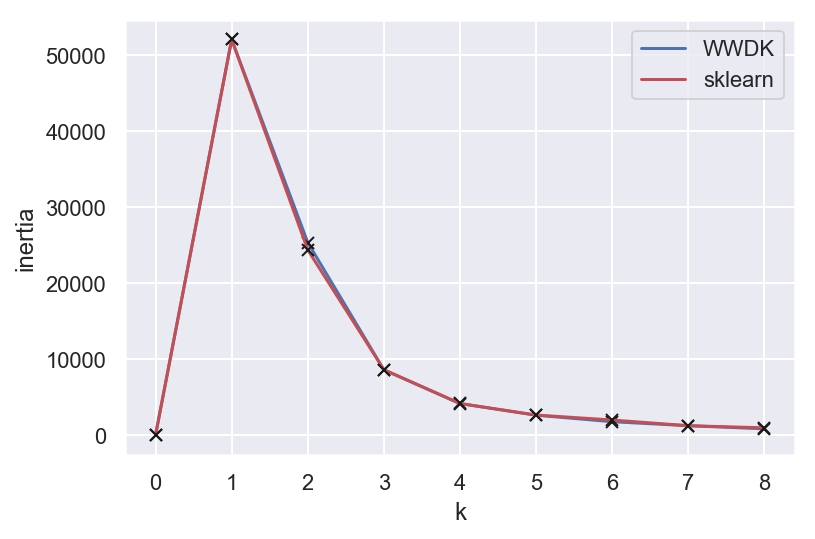

In [4]:
inertia_k_plot(X, iterations=8, runs=10)

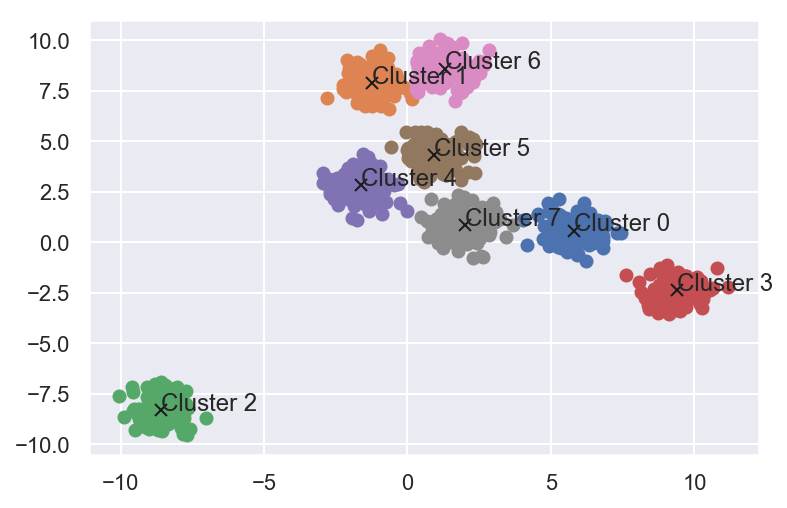

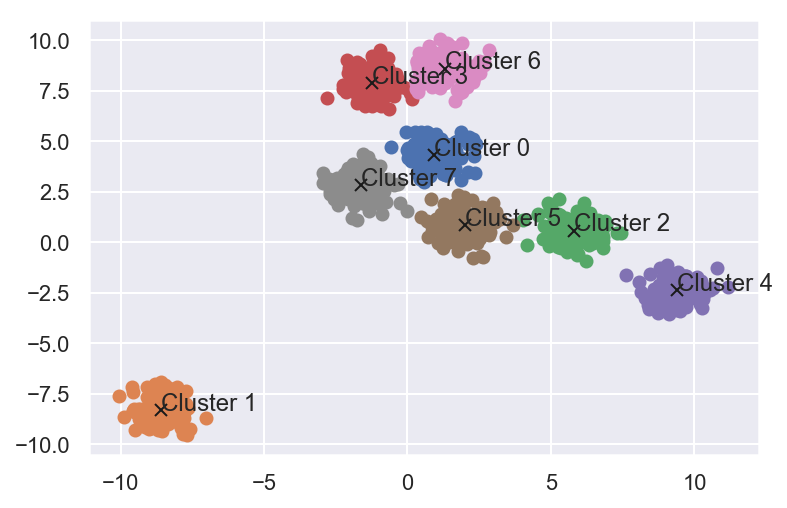

In [20]:
single_sk = sk.KMeans(n_clusters=8)

single_cl = cl.Kmeans(k=8, tol=1e-3)

single_cl.fit(X)
single_sk.fit(X)
plot(X,single_cl.labels_, single_cl.cluster_centers_, 8)
plot(X,single_sk.labels_, single_sk.cluster_centers_, 8)


In [24]:
#print(single_cl.fit_transform(X))
#np.sum(np.min(single_cl.fit_transform(X)**2,axis=1))
single_sk.fit_transform(X) == single_cl.fit_transform(X)
 

array([[False, False,  True, ..., False, False, False],
       [False, False, False, ...,  True, False, False],
       [False, False,  True, ...,  True, False, False],
       ...,
       [False, False,  True, ..., False, False, False],
       [False, False,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False]])

In [25]:
single_sk.inertia_

678.2638003289909

In [26]:
single_cl.inertia_

678.263800328991

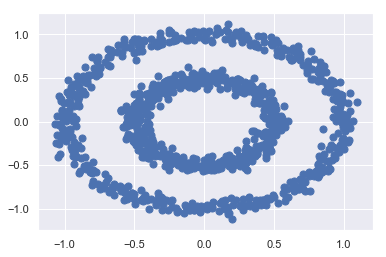

In [30]:

from sklearn import datasets
my_tuple = X, y_true = datasets.make_circles(n_samples=1000, factor=.5,
                                      noise=.05)
plt.scatter(X[:, 0], X[:, 1], s=50);

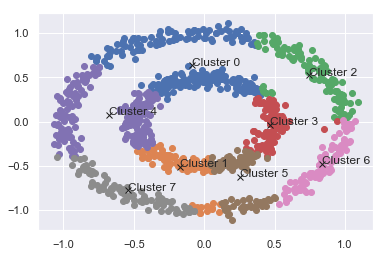

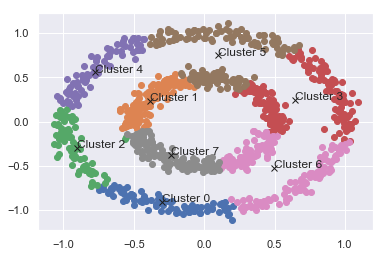

In [31]:
import sklearn.cluster as sk
from wwdk import data as d
from wwdk import cluster as cl

def plot(data, dist, clusters,k):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for i in range(k):
        graph = pd.DataFrame(data[np.argwhere(dist == i)].squeeze())
        center = pd.DataFrame(clusters[i]).T
        #print("Cluster"+ str(i) +  " -- Assigned Points \n" + str(graph))
        ax.plot(graph[0], graph[1], "o")
        ax.plot(center[0],center[1], "kx")
        ax.annotate("Cluster " + str(i), xy = (center[0],center[1])
            )   
    plt.show
    
me = cl.Kmeans(inits=10, method="rng", k=8, tol= 1)
me.fit(X)
ske = sk.KMeans(n_init=10, init="random", n_clusters=8, tol= 1)
ske.fit(X)

plot(X,me.labels_, me.cluster_centers_, 8)
plot(X,ske.labels_, ske.cluster_centers_, 8)

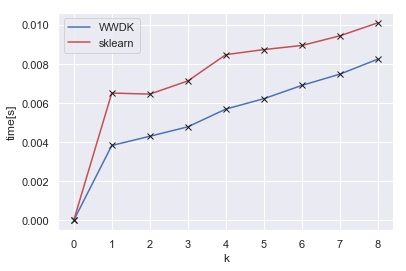

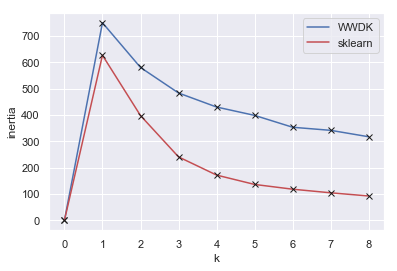

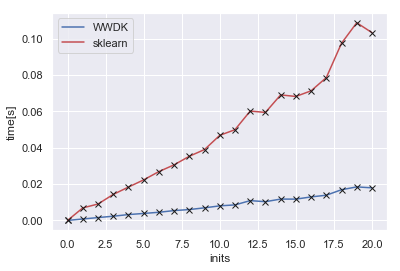

In [32]:
time_k_plot(X, iterations=8, runs=10)
inertia_k_plot(X, iterations=8, runs=10)
time_init_plot(X, iterations=20, runs=30)


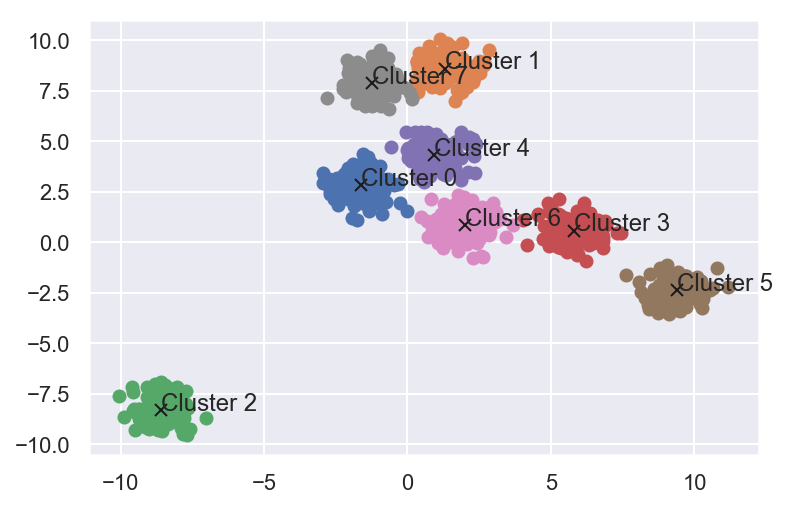

In [28]:
plot(single_cl)

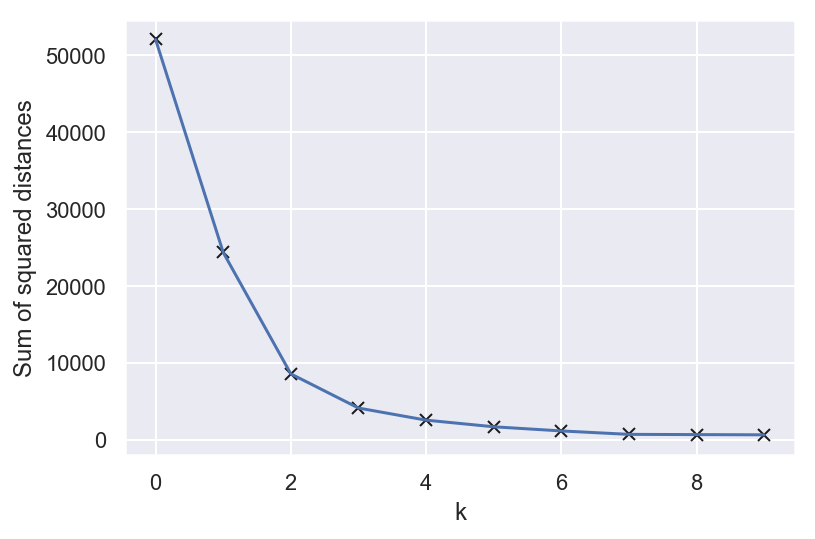

In [31]:
elbow_plot(X, 10)

In [3]:
from wwdk import Utilities as u

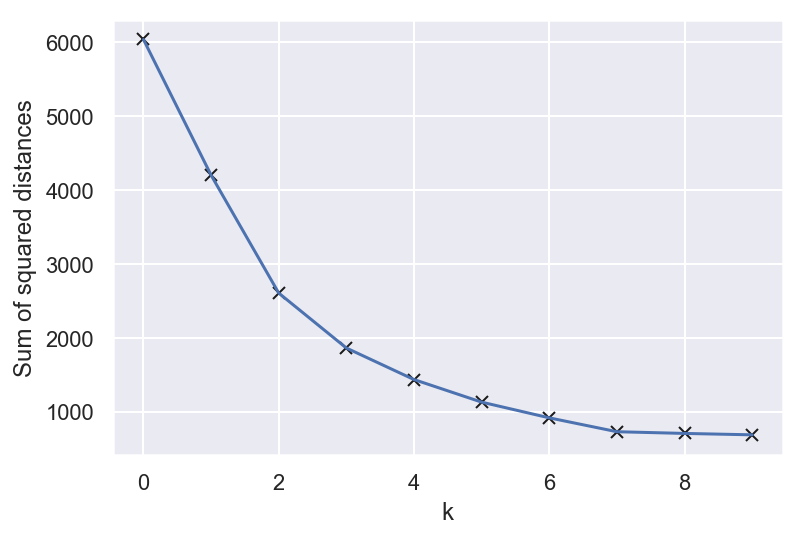

In [4]:
u.elbow_plot(X, 10)

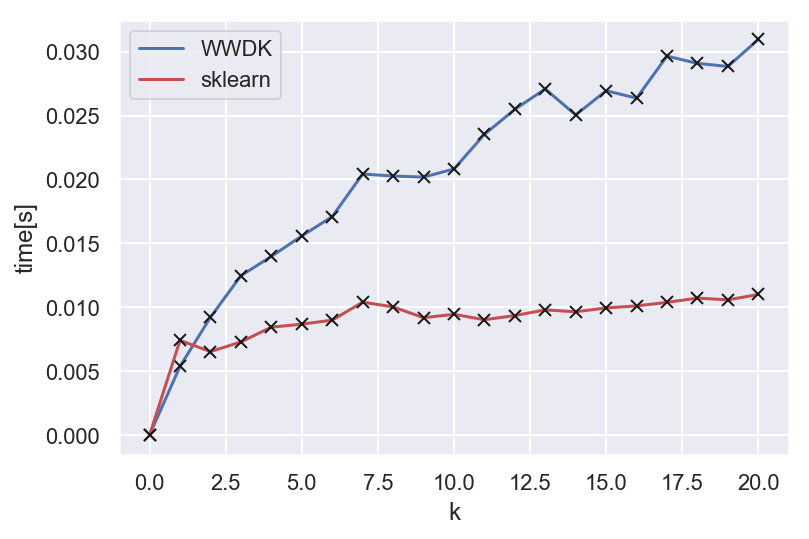

In [11]:
u.time_k_plot(X,20,5)

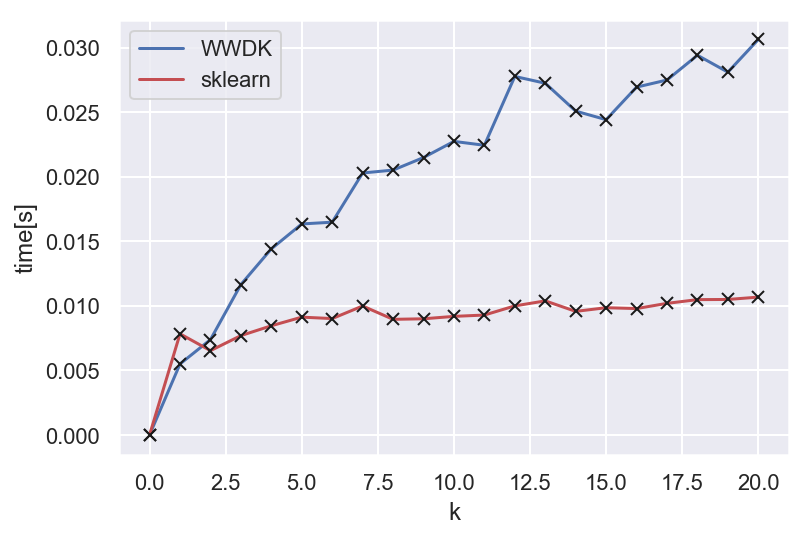

In [5]:
u.time_k_plot(X,20,5)